In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('sale_analysis_modified.csv')

- notethat: analyze only sales occurred in 2019. Therefore, drop 2020-01 

In [2]:
df = df[df['Month']!= '2020-01']
df.head()
used_col = ['Product','Product Category','Quantity Ordered','Price Each','Order Date','Month_name','Month','City','State']
df = df[used_col]

# Sales Analysis Starts With Good Questions
1. ยอดขายรวมแต่ละเดือน ฺBig Picture
2. ยอดขายสินค้าของแต่ละเดือนมาจาก Category ไหนมากสุด
3. ยอดขายสินค้าในแต่ละ City ในแต่ละ City เป็นอย่างไร
4. ในช่วงวันจัน-อาทิตย์สินค้าประเภทไหนขายดีเป็นพิเศษ
5. ยอดขายของแต่ละผลิตภัณฑ์ตามรายเดือน
6. Distribution of each product category
7. Peak Hours Are Critical in Driving Store Performance
8. Thinkpad laptop vs Macbook Sales in different region
9. Headphones Sales in different region

### 1. ยอดขายรวมแต่ละเดือน ฺBig Picture

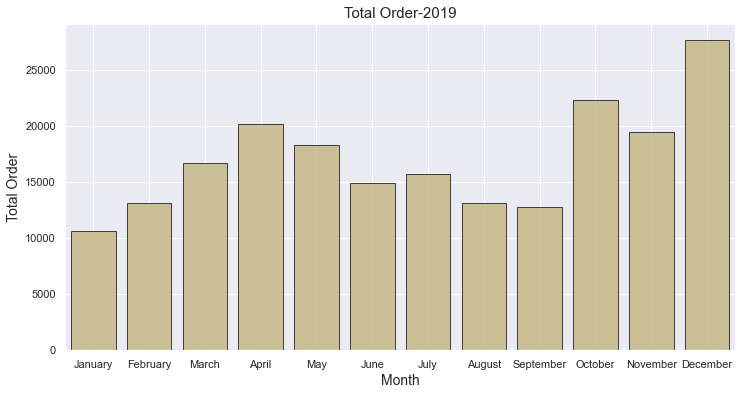

In [174]:
by_MonthSale = df.groupby(['Month','Month_name']).sum().reset_index()
by_MonthSale = by_MonthSale.rename(columns={'Quantity Ordered':'Total Order','Price Each':'Total Sales'})
plt.figure(figsize=(12,6))
plt.rcParams.update({'font.size':12})
sns.barplot(data=by_MonthSale,x='Month_name',y='Total Order',color='y',edgecolor='.1',alpha=0.8)
plt.title('Total Order-2019',fontsize=15)
plt.xlabel('Month',fontsize=14)
plt.ylabel('Total Order',fontsize=14)
plt.grid(True)
plt.show()
# plt.rcParams.update(fontsize=14)

###  2. ยอดขายสินค้าของแต่ละเดือนมาจาก Category ไหนมากสุด


In [10]:
df.head()

,Product,Product Category,Quantity Ordered,Price Each,Order Date,Month_name,Month,City,State
0,Wired Headphones,Headphones,1,11.99,2019-01-01 03:07:00,January,2019-01,New York City,NY
1,USB-C Charging Cable,Charging Cable,1,11.95,2019-01-01 03:40:00,January,2019-01,San Francisco,CA
2,Apple Airpods Headphones,Headphones,1,150.00,2019-01-01 04:56:00,January,2019-01,New York City,NY
3,AAA Batteries (4-pack),Batteries,1,2.99,2019-01-01 05:53:00,January,2019-01,Dallas,TX
4,USB-C Charging Cable,Charging Cable,2,11.95,2019-01-01 06:03:00,January,2019-01,Atlanta,GA


In [11]:
monthSummary = df.groupby(['Month','Month_name','Product Category']).sum().reset_index()
monthSummary = monthSummary.rename(columns={'Quantity Ordered':'Total Quantity','Price Each':'Total Sales'})
monthSummary
idx_Dryer = monthSummary[monthSummary['Product Category']=='Dryer'].index

idx_WashingMachine = monthSummary[monthSummary['Product Category']=='Washing Machine'].index

monthSummary = monthSummary.drop(index=idx_Dryer)
monthSummary = monthSummary.drop(index=idx_WashingMachine)

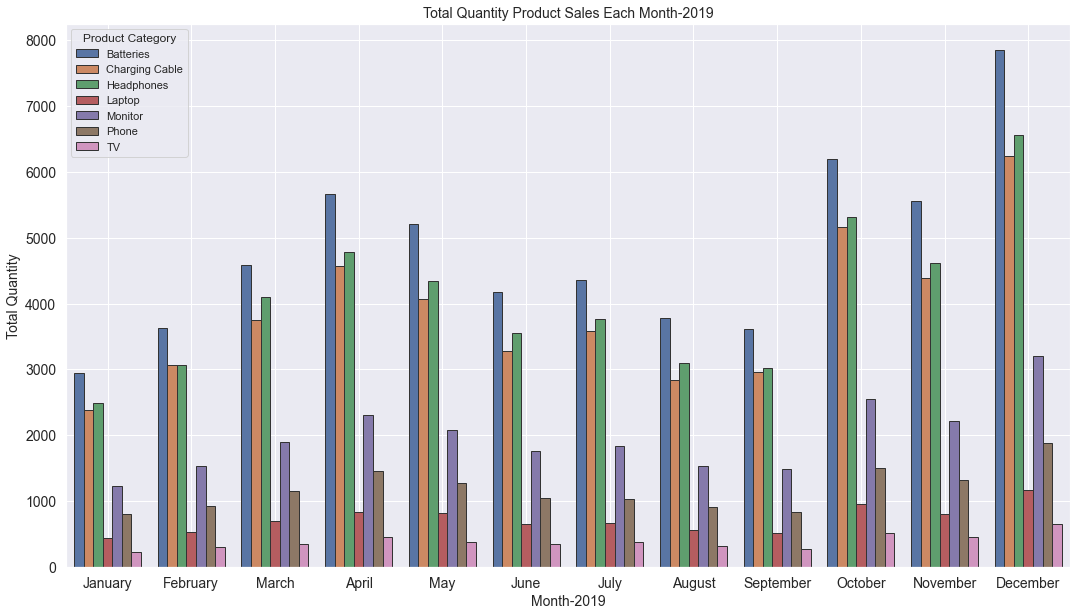

In [159]:
sns.set_theme()
plt.figure(figsize=(18,10))
ax = sns.barplot(x="Month_name", y="Total Quantity", hue="Product Category",data=monthSummary,edgecolor='.2')
plt.title('Total Quantity Product Sales Each Month-2019',fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Month-2019',fontsize=14)
plt.ylabel('Total Quantity',fontsize=14)
plt.grid(True)
plt.show()

### 3. ยอดขายสินค้าในแต่ละ City ในแต่ละ City เป็นอย่างไร


In [13]:
by_city = df.groupby(['City','Product Category']).sum().reset_index()
# drop Dryer and drop washing machine
by_city
idx_Dryer = by_city[by_city['Product Category']=='Dryer'].index
idx_WashingMachine = by_city[by_city['Product Category']=='Washing Machine'].index
by_city = by_city.drop(index=idx_Dryer)
by_city = by_city.drop(index=idx_WashingMachine)
by_city.rename(columns={'Quantity Ordered':'Total Quantity',"Price Each":"Total Sales"},inplace=True)

In [14]:
by_city

,City,Product Category,Total Quantity,Total Sales
0,Atlanta,Batteries,4476,10984.63
1,Atlanta,Charging Cable,3723,46539.90
3,Atlanta,Headphones,3847,308155.36
4,Atlanta,Laptop,723,982696.48
5,Atlanta,Monitor,1866,487171.47
...,...,...,...,...
75,Seattle,Headphones,3896,305460.76
76,Seattle,Laptop,674,918296.75
77,Seattle,Monitor,1933,522940.73
78,Seattle,Phone,1130,695200.00


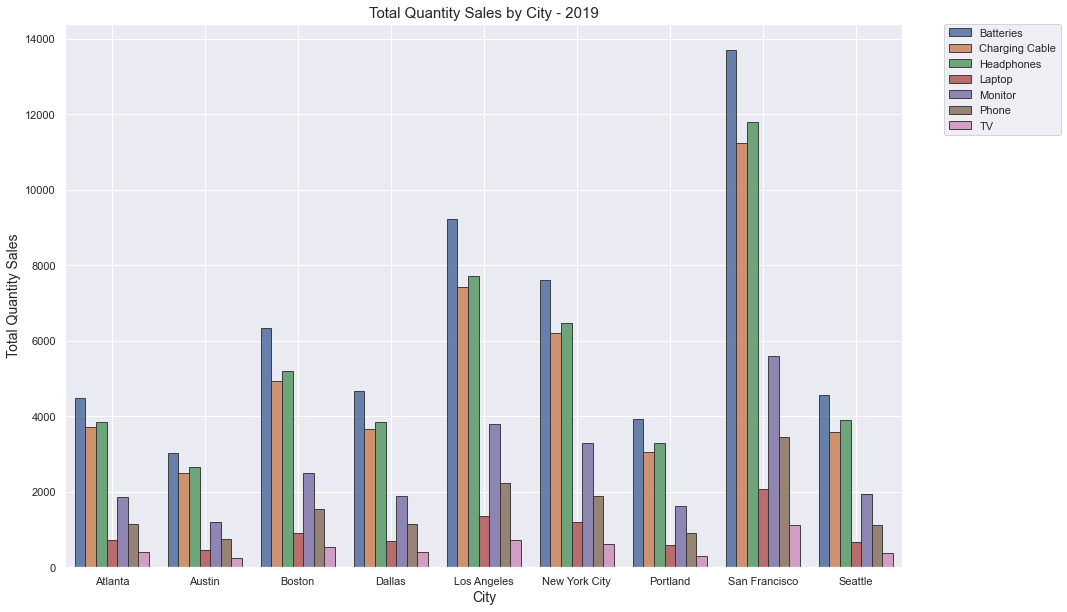

In [176]:
plt.figure(figsize=(15,10))
sns.barplot(data=by_city,x='City',y='Total Quantity',hue='Product Category',edgecolor='.2',alpha=0.9)
plt.title('Total Quantity Sales by City - 2019',fontsize=15)
plt.xlabel('City',fontsize=14)
plt.ylabel('Total Quantity Sales',fontsize=14)
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

### 4. ในช่วงวันจัน-อาทิตย์สินค้าประเภทไหนขายดีเป็นพิเศษ

In [16]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['dayname'] = df['Order Date'].dt.day_name()
df.head()

,Product,Product Category,Quantity Ordered,Price Each,Order Date,Month_name,Month,City,State,dayname
0,Wired Headphones,Headphones,1,11.99,2019-01-01 03:07:00,January,2019-01,New York City,NY,Tuesday
1,USB-C Charging Cable,Charging Cable,1,11.95,2019-01-01 03:40:00,January,2019-01,San Francisco,CA,Tuesday
2,Apple Airpods Headphones,Headphones,1,150.00,2019-01-01 04:56:00,January,2019-01,New York City,NY,Tuesday
3,AAA Batteries (4-pack),Batteries,1,2.99,2019-01-01 05:53:00,January,2019-01,Dallas,TX,Tuesday
4,USB-C Charging Cable,Charging Cable,2,11.95,2019-01-01 06:03:00,January,2019-01,Atlanta,GA,Tuesday


In [17]:
by_day = df.groupby(['dayname','Product Category']).sum().reset_index()
idx_Dryer = by_day[by_day['Product Category']=='Dryer'].index
idx_Washing = by_day[by_day['Product Category']=='Washing Machine'].index
by_day = by_day.drop(idx_Dryer)

by_day = by_day.drop(idx_Washing)

In [18]:
by_day = by_day.rename(columns={'Quantity Ordered':'Total Quantity',"Price Each":"Total Sales"})
by_day.head()


,dayname,Product Category,Total Quantity,Total Sales
0,Friday,Batteries,8078,19512.60
1,Friday,Charging Cable,6580,81701.25
3,Friday,Headphones,6817,526886.86
4,Friday,Laptop,1202,1650694.39
5,Friday,Monitor,3382,886556.28


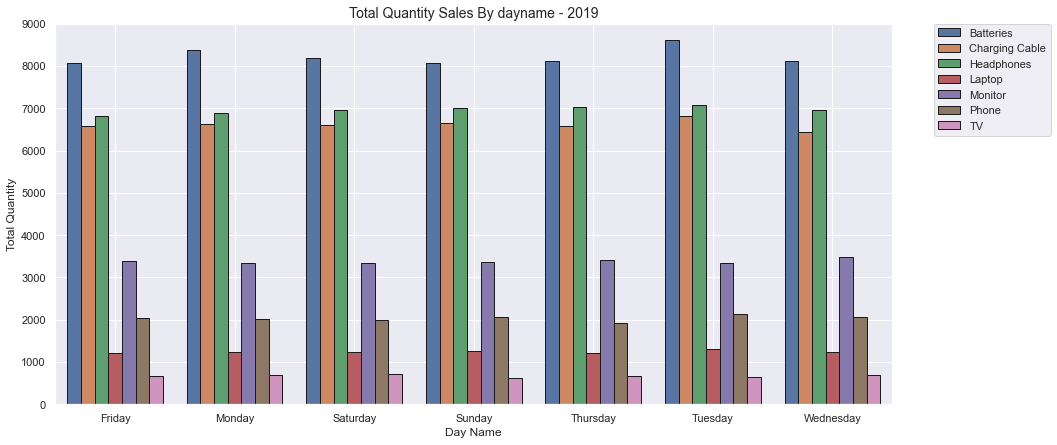

In [150]:
plt.figure(figsize=(15,7))
sns.barplot(data=by_day,x='dayname',y='Total Quantity',hue='Product Category',edgecolor='.1')
plt.title('Total Quantity Sales By dayname - 2019',fontsize=14)
plt.xlabel('Day Name')
plt.ylabel('Total Quantity')
plt.ylim((0,9000))
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

### 5. ยอดขายของแต่ละผลิตภัณฑ์ตามรายเดือน

In [20]:
monthSummary

,Month,Month_name,Product Category,Total Quantity,Total Sales
0,2019-01,January,Batteries,2954,7058.88
1,2019-01,January,Charging Cable,2382,29296.50
3,2019-01,January,Headphones,2485,193707.85
4,2019-01,January,Laptop,444,605397.89
5,2019-01,January,Monitor,1234,319647.70
...,...,...,...,...,...
102,2019-12,December,Headphones,6560,513417.09
103,2019-12,December,Laptop,1165,1610194.71
104,2019-12,December,Monitor,3203,852888.06
105,2019-12,December,Phone,1880,1161100.00


<Figure size 1080x720 with 0 Axes>

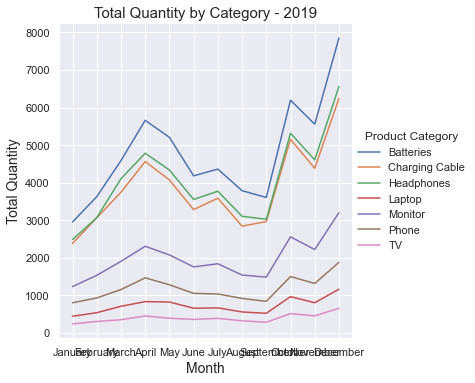

In [21]:
g = plt.figure(figsize=(15,10))
g = sns.relplot(data=monthSummary,x='Month_name',y='Total Quantity',kind='line',hue='Product Category')
# g.figure.set_size_inches(6.5, 4.5)
plt.title('Total Quantity by Category - 2019',fontsize=15)
plt.xlabel('Month',fontsize = 14)
plt.ylabel('Total Quantity',fontsize=14)
plt.grid(True)
plt.show()

### 6. Distribution of each product category

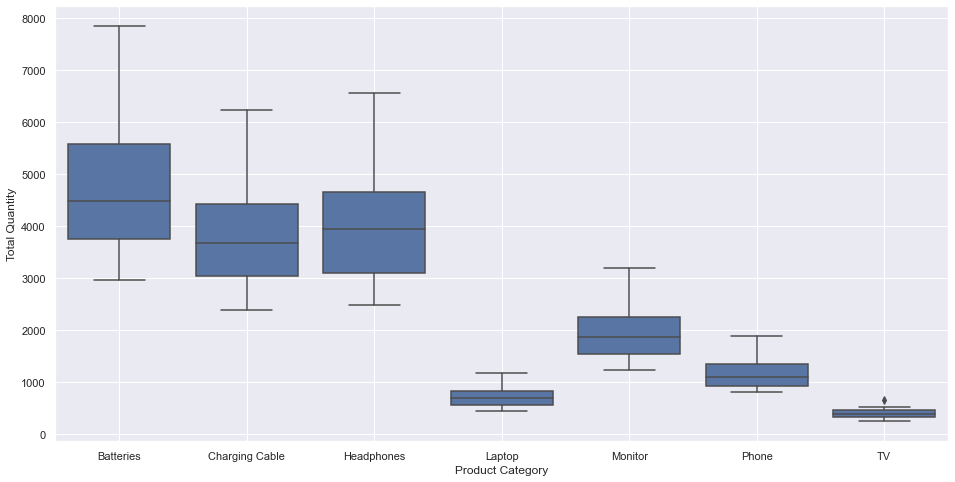

In [148]:
plt.figure(figsize=(16,8))
sns.boxplot(data=monthSummary,x='Product Category',y='Total Quantity',color='b')
plt.grid(True)

### 7. Peak Hours Are Critical in Driving Store Performance
- Ex. In San Francisco on Weekend

                       Product Product Category  Quantity Ordered  Price Each  \
1186           ThinkPad Laptop           Laptop                 1      999.99   
1188  Apple Airpods Headphones       Headphones                 1      150.00   
1189  Apple Airpods Headphones       Headphones                 1      150.00   
1190      USB-C Charging Cable   Charging Cable                 1       11.95   
1192      USB-C Charging Cable   Charging Cable                 1       11.95   

              Order Date Month_name    Month           City State   dayname  \
1186 2019-01-05 00:05:00    January  2019-01  San Francisco    CA  Saturday   
1188 2019-01-05 00:09:00    January  2019-01  San Francisco    CA  Saturday   
1189 2019-01-05 00:18:00    January  2019-01  San Francisco    CA  Saturday   
1190 2019-01-05 00:45:00    January  2019-01  San Francisco    CA  Saturday   
1192 2019-01-05 01:25:00    January  2019-01  San Francisco    CA  Saturday   

       hour  
1186  00:00  
1188  00:0

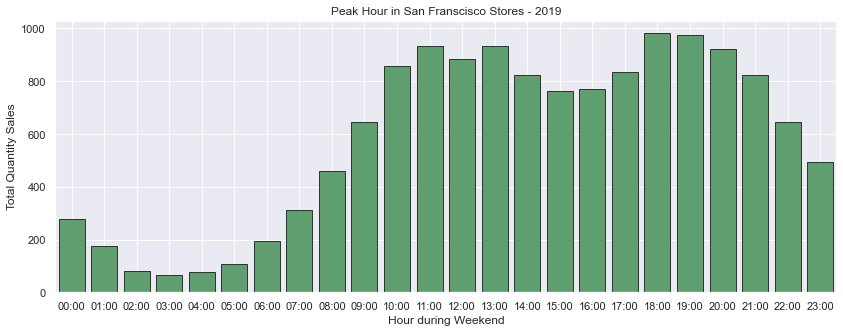

In [130]:
df['hour'] = df['Order Date'].dt.strftime('%H').add(':00')
df_SF = df[(df['City']=='San Francisco')& ((df['dayname']=='Saturday')|(df['dayname']=='Sunday'))]
print(df_SF.head())
df_SF = df_SF.groupby(['hour']).sum().reset_index()
df_SF = df_SF.sort_values('hour')
df_SF
plt.figure(figsize=(14,5))
plt.rcParams.update({'font.size':19})
sns.barplot(data=df_SF,x='hour',y='Quantity Ordered',color='g',errcolor=".2", edgecolor=".2")
plt.title('Peak Hour in San Franscisco Stores - 2019')
plt.xlabel('Hour during Weekend')
plt.ylabel('Total Quantity Sales')
plt.grid(True)
plt.show()


### 8. Thinkpad laptop vs Macbook Sales in different region

In [83]:
laptop = df[df['Product Category']=='Laptop']
laptop = laptop.groupby(['Product','City']).sum().reset_index()
laptop.rename(columns = {'Quantity Ordered':'Total Sales in Quantity'},inplace= True)

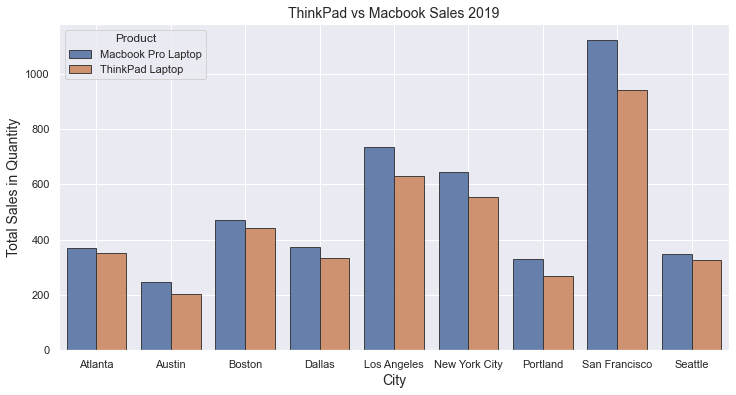

In [141]:
plt.figure(figsize=(12,6))
sns.barplot(data=laptop,x='City',y='Total Sales in Quantity',hue='Product',alpha=0.9,errcolor='.15',edgecolor='.2')
plt.title("ThinkPad vs Macbook Sales 2019",fontsize=14)
plt.xlabel('City',fontsize=14)
plt.ylabel('Total Sales in Quantity',fontsize=14)
plt.grid(True)
plt.show()

### 9. Headphones Sales in different region in different months

In [142]:
headphones = df[df['Product Category']=='Headphones']
headphones = headphones.groupby(['Product','City']).sum().reset_index()
headphones.rename(columns = {'Quantity Ordered':'Total Sales in Quantity'},inplace= True)

In [143]:
headphones

,Product,City,Total Sales in Quantity,Price Each
0,Apple Airpods Headphones,Atlanta,1245,186300.00
1,Apple Airpods Headphones,Austin,863,128700.00
2,Apple Airpods Headphones,Boston,1623,241800.00
3,Apple Airpods Headphones,Dallas,1176,175350.00
4,Apple Airpods Headphones,Los Angeles,2420,360150.00
5,Apple Airpods Headphones,New York City,2062,306450.00
6,Apple Airpods Headphones,Portland,1078,160200.00
7,Apple Airpods Headphones,San Francisco,3660,544800.00
8,Apple Airpods Headphones,Seattle,1229,183150.00
9,Bose SoundSport Headphones,Atlanta,1056,104889.51


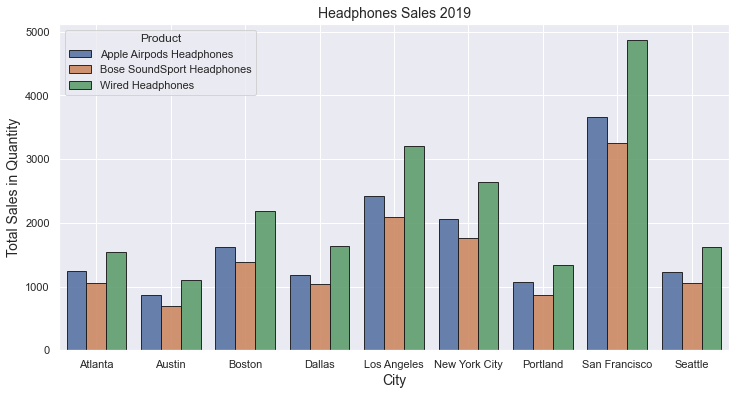

In [145]:
plt.figure(figsize=(12,6))
sns.barplot(data=headphones,x='City',y='Total Sales in Quantity',hue='Product',alpha=0.9,edgecolor='.1',errcolor='.2')
plt.title("Headphones Sales 2019",fontsize=14)
plt.xlabel('City',fontsize=14)
plt.ylabel('Total Sales in Quantity',fontsize=14)
plt.grid(True)
plt.show()